# PySeison - Tutorial 2: Station class

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## 1. PySeidon - Station object initialisation

Similarly to the "FVCOM class", the "Station class" is a numerical-model-based object.

### 1.1. Package importation

As any other library in *Python*, PySeidon has to be first imported before to be used. Here we will use an alternative *import* statement compared to the one previoulsy presented:  

In [2]:
from pyseidon import *

*** Star *** here means *all*. Usually this form of statements would import the entire library. In the case of *PySeidon*, this statement will import the following object classes: FVCOM, Station, Validation, ADCP, Tidegauge and Drifter. Only the Station class will be tackle in this tutorial. However note should note that the architecture design and functioning between each classes are very similar. 

### 1.2. Object definition

*Python* is by definition an [**object oriented language**](http://www.tutorialspoint.com/python/python_classes_objects.htm)...and so is *matlab*. *PySeidon* is based on this notion of object, so let us define our first "Station" object.

***Exercise 1: ***
- Unravel Station documentation with Ipython ***shortcuts***

***Answer: ***

In [3]:
Station?

According to the documentation, in order to define a Station object, the only required input is a ***filename**. This string input represents path to a file or a folder containing files (e.g. *testStation=Station('./path_to_Station_output_file/filename')* or *testStation=Station('./path_to_Station_output_file/folder/')* ) and whose file can be a pickle file (i.e. *.p) or a netcdf file (i.e. *.nc).

**Note** that the specified folder must contain station's netcdf/pickle files which could be sorted time wise thanks to their names (e.g. by adding a time stamp to the file name for instance) and with the word 'station' in their name.

***Additionally, either a local file path or a OpenDap url could be used!***

***Exercise 2: ***
- define a station object named *station* from the following **opendap url**: http://ecoii.acadiau.ca/thredds/dodsC/ecoii/test/Station3D_dngrid_BF_20130730_20130809.nc

***Answer: ***

In [4]:
station=Station('http://ecoii.acadiau.ca/thredds/dodsC/ecoii/test/Station3D_dngrid_BF_20130730_20130809.nc')

Retrieving data through OpenDap server...
Initialisation...


### 1.3. Object attributes, functions, methods & special methods

The Station object possesses 4 attributes, 5 methods  (or 4 for 2D simulations) and 1 special method. They would appear by typing ***station. Tab*** for instance.

An *attribute* is a quantity intrinsic to its *object*. A *method* is an intrinsic *function* which changes an *attribute* of its object. Contrarily a *function* will generate its own *output*:

The Station attributes are:
- ***History***: history metadata that keeps track of the object changes
- ***Data***: gathers the raw/unchanged data of the specified *.nc file
- ***Grid***: gathers the grid related data
- ***Variables***: gathers the hydrodynamics related data. Note that methods will generate new fields in this attribute

The Station methods & functions are:
- ***Util2D***: gathers utility methods and functions for use with 2D and 3D variables
- ***Util3D***: gathers utility methods and functions for use only with 3D variables. Note that this attribut will not appear for 2D simulations.
- ***Plots***: gathers plotting methods for use with 2D and 3D variables
- ***Save_as***: save loally the current object and its attributs in a pickle file or a matlab file. Note that the so created pickle file can be use later on to define a FVCOM object and therefore restart your work where you left it...yet be careful what you wish for!!! Be aware that FVCOM runs can be very large in terms of memory when you decide to save anything from OpenDap.
- ***dump_profile_data***: dumps profile data (x,y) in a *.csv file.

The special Station method permits to ***stack*** two station objects (e.g. station1 and station2) through a simple addition, as such: 

However, station1 and station2 must be consecutive in time (e.g. station1 before in time compared to station2). Note that the ***History*** attribute will be changed accordingly.

## 2. PySeidon - Hands-on (30 mins)

### Util2D

***Exercise 3: ***
- Print the list of station's ***name*** contained in the *station* object (hint: look into ***Grid***)
- Use ***Util2D.flowDir*** to compute the velocity norm and flow direction timeseries at the ***GP_120726_BPa*** station
- Use the same function but turn the ***exceedance*** option to ***True***
- Use ***Util2D.ebb_flood_split*** function to get the ebb and flood time indices for the ***GP_120726_BPa*** station
- Compute the mean flow speed for ebb and flood (optional: and print them out)
- Plot the flow speed hitograms of stations ***Westport***, ***DG_1a*** and ***PP-120917-BPa*** using ***Util2D.speed_histogram***
- Perform a harmonic analysis of the velocities at the ***GP_120726_BPa*** station and print out the result
- Reconstruction these velocities based on the harmonic results of the previous question

***Answer: ***

['Westport            ' 'Digby               ' 'St.                 '
 'DG_120130_SUa       ' 'DG_120130_BPa       ' 'DG_120130_BPb       '
 'DG_120130_BPc       ' 'DG_120130_SUb       ' 'DG_140115_BPa       '
 'DG_140115_BPb       ' 'GP_100915_BPa       ' 'GP_100915_BPb       '
 'GP_120726_BPa       ' 'GP_120726_BPb       ' 'GP_120726_BPc       '
 'GP_120726_BPd       ' 'GP_120726_SU        ' 'GP_120904_TA        '
 'GP_120905_TM        ' 'GP_130620_BPa       ' 'GP_130620_BPb       '
 'GP_130730_TA        ' 'GP_130731_TM        ' 'GP_130730_SM        '
 'GP_130806_SM        ' 'PP-120917-BPa       ' 'PP-120917-BPb       '
 'PP-120917-BPc       ' 'PP-120917-BPd       ' 'PP-120917-SU        '
 'GP-140722-BP        ' 'GP-2b               ' 'DG_1a               '
 'DG_1b               ' 'DG_1c               ' 'DG_1d               '
 'DG_1e               ' 'DG_1f               ' 'DG_plat1            '
 'DG_plat2            ' 'DG_plat3            ' 'DG_plat4            ']
Flood mean flow spe

/usr/local/lib/python2.7/dist-packages/matplotlib/figure.py:387: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


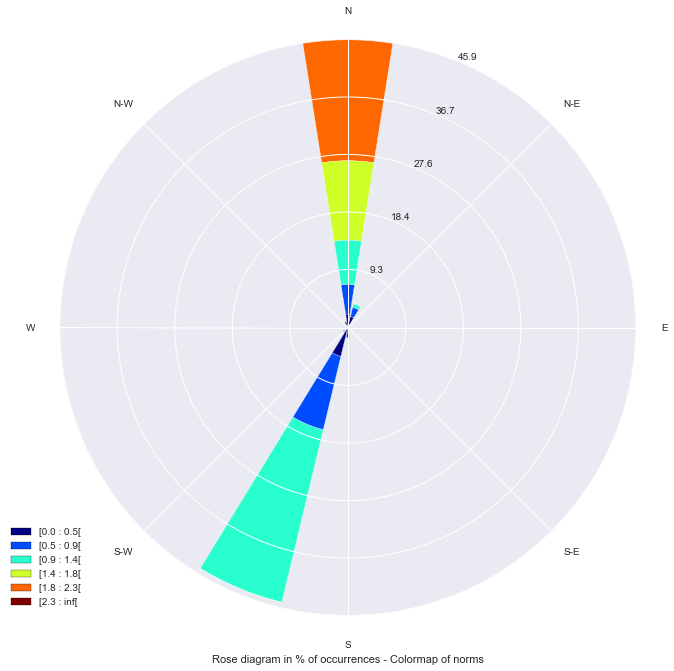

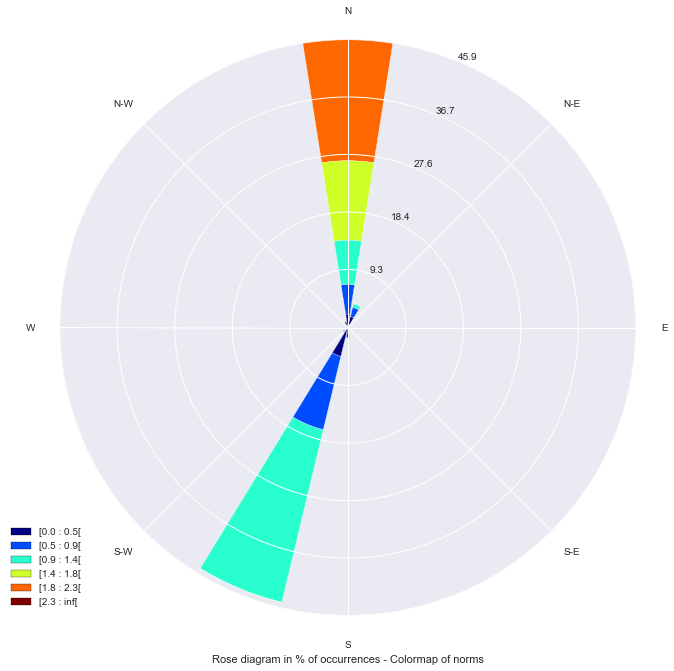

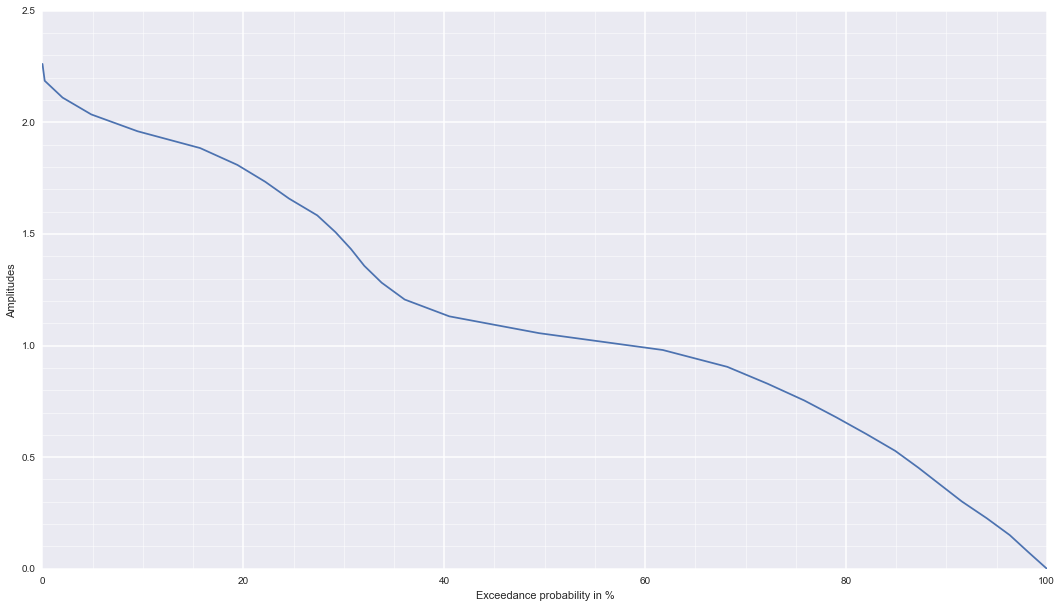

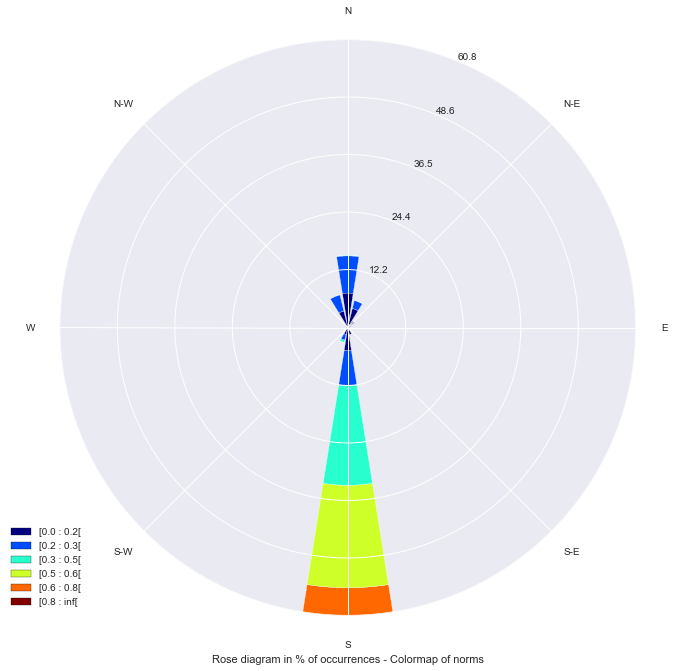

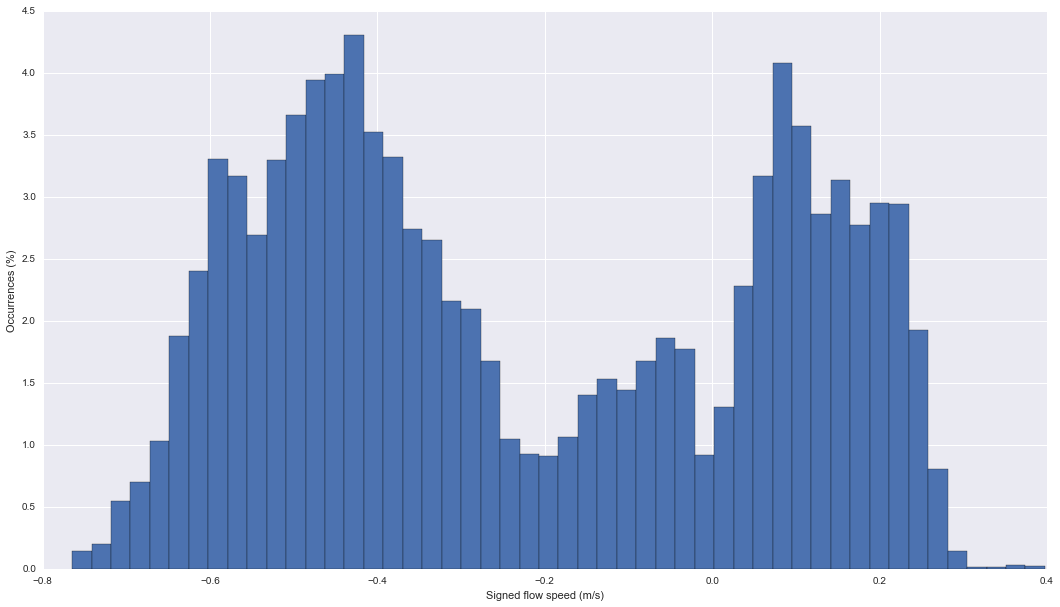

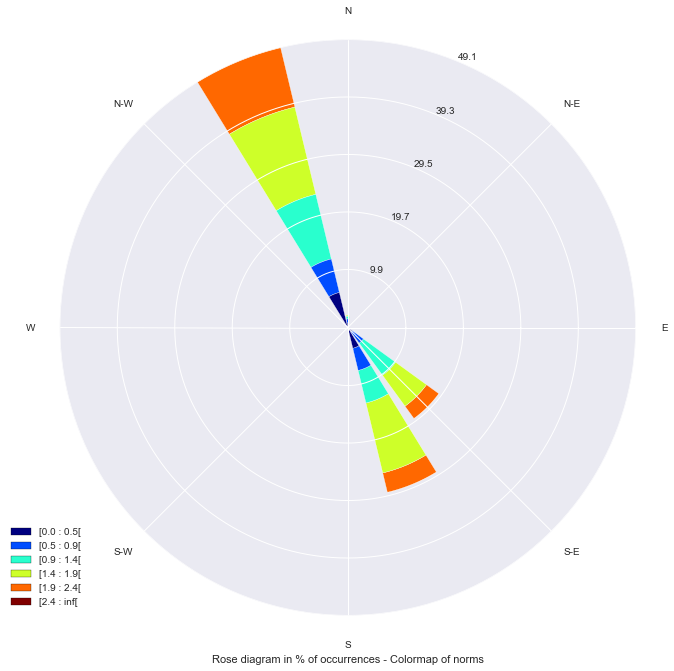

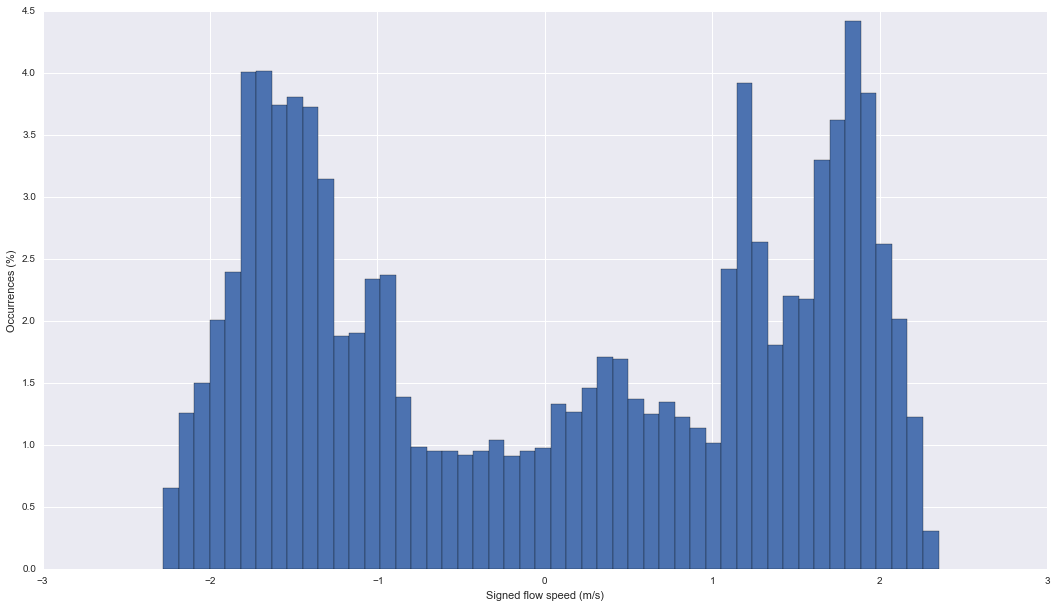

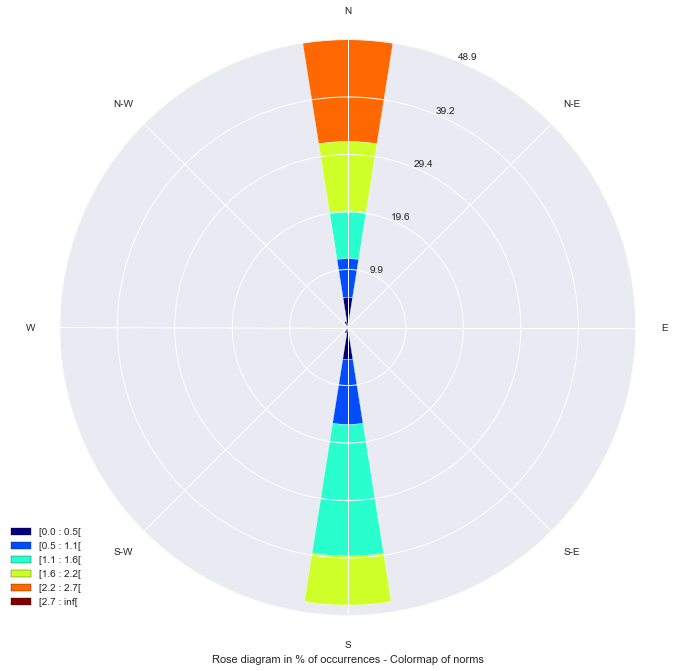

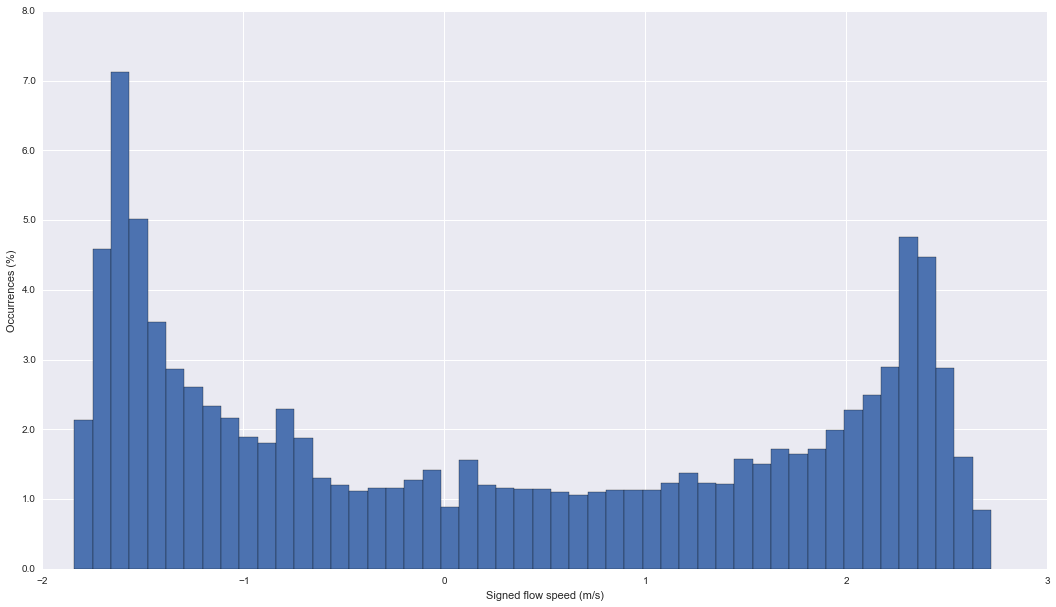

In [5]:
print station.Grid.name
flowDir, velNorm = station.Util2D.flow_dir('GP_120726_BPa')
flowDir, velNorm = station.Util2D.flow_dir('GP_120726_BPa', exceedance=True)
fI, eI, pa, pav = station.Util2D.ebb_flood_split('GP_120726_BPa')
print "Flood mean flow speed: " + str(velNorm[fI].mean()) + " m/s"
print "Ebb mean flow speed: " + str(velNorm[eI].mean()) + " m/s"
station.Util2D.speed_histogram('Westport')
station.Util2D.speed_histogram('DG_1a')
station.Util2D.speed_histogram('PP-120917-BPa')
harmo = station.Util2D.Harmonic_analysis_at_point('GP_120726_BPa', velocity=True, elevation=False)
print harmo
velos = station.Util2D.Harmonic_reconstruction(harmo)

### Util3D

***Exercise 4: ***
- Compute and plot the ***veritcal shear*** for the ebb indexes at the ***GP_120726_BPa*** station
- Compute and plot the ***velocity norm*** for the flood indexes at the ***GP_120726_BPa*** station
- Compute the ***flow direction*** for each vertical level for the flood indexes
- ***Plot*** these flow direction vs ***depths*** at the ***GP_120726_BPa*** station averaged over the flood indexes

***Answer: ***

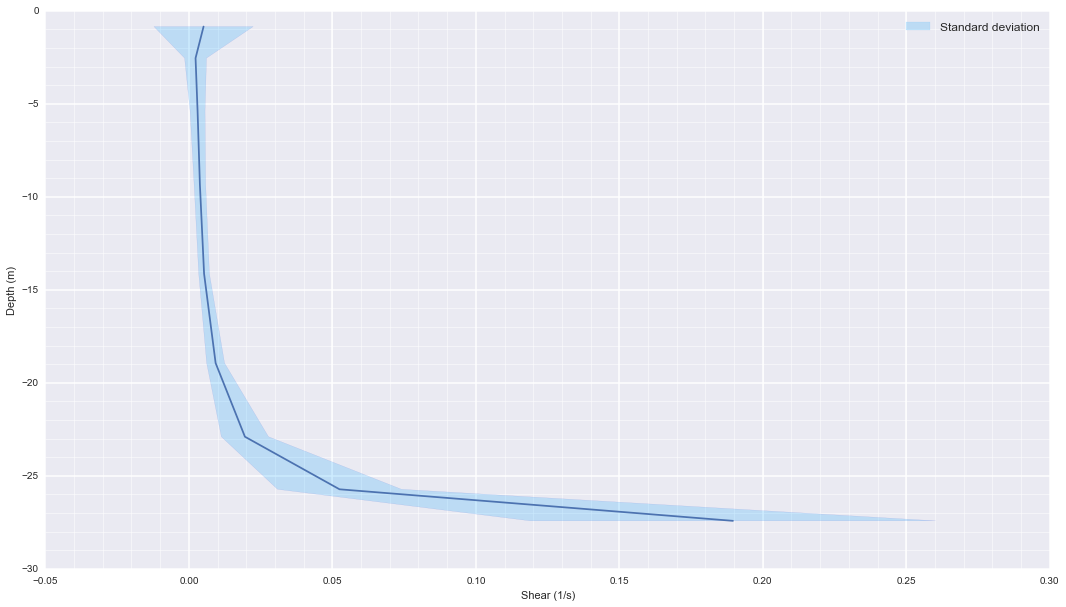

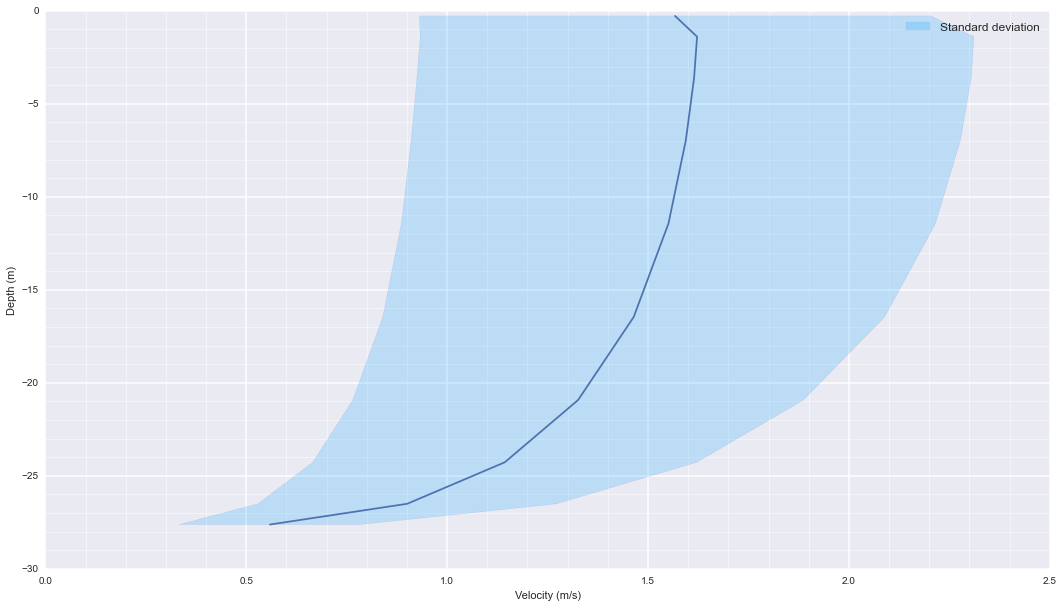

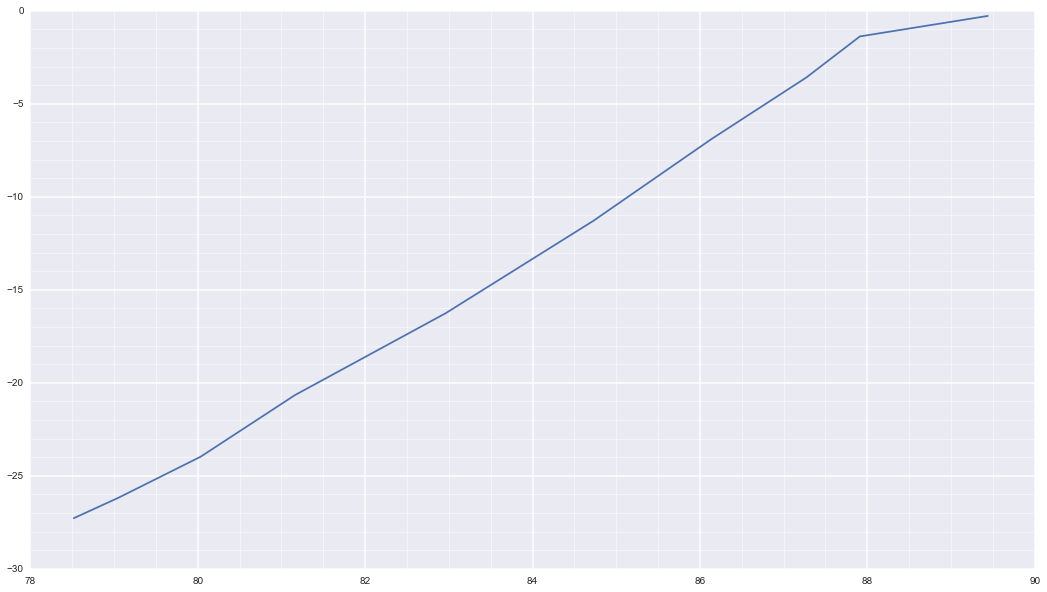

In [6]:
vs = station.Util3D.verti_shear('GP_120726_BPa', time_ind=eI)
norm = station.Util3D.velo_norm('GP_120726_BPa', time_ind=fI)
fd = station.Util3D.flow_dir('GP_120726_BPa', time_ind=fI, vertical=True)
depths = station.Util3D.depth('GP_120726_BPa')
meandepths = np.mean(depths[fI], axis=0)
meanfd = np.mean(fd,axis=0)
station.Plots.plot_xy(meanfd, meandepths, title='Flood flow direction at GP_120726_BPa', xlabel='direction', ylabel='depth')

### Save functions

***Exercise 5: ***
- ***Dump*** averaged shear and depth data in a *.csv file

***Answer: ***

In [7]:
station.dump_profile_data(meanfd, meandepths, title='Flood flow direction at GP_120726_BPa', xlabel='direction', ylabel='depth')

## 4. Bug patrol & steering committee

### 4.1. Bug report

As beta tester, your first assignement is to report bugs...yet not everything is a bug. The first thing to check before to report a bug is to verify that your version of *PySeidon* is up-to-date. The best way to keep up with the package evolution is to [***git***](http://git-scm.com/) to ***clone*** the repository, use ***pull*** to update it and ***re-install*** it if needed. 

The second thing to check before to report a bug is to verify that the bug is ***reproducible***. When running into a bug, double check that your inputs fit the description of the documentation then turn the ***debug flag on*** (e.g. *output = stationobject.function(inputs, debug=True)*) and submit the command again. If the error re-occurs then report it (i.e. copy entire error message + command and send it to package administrator)

### 4.2. Suggestions & critics

Your second role as beta-tester is to submit suggestions and critics to the developpers regarding the functioning and functionality of the package. Beta testing phase is the best opportunity to steer a project towards the applications you would like to be tackled...